# Feb 12, 22

In [1]:
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
plt.rcParamsDefault['font.family'] = "sans-serif"
plt.rcParamsDefault['font.sans-serif'] = "Arial"
plt.rcParams['font.size'] = 9
plt.rcParams["errorbar.capsize"] = 0.5

In [2]:
# vector of activity for each roi
num_rois = 85
roi_data = np.random.rand(num_rois)

In [3]:
# from nilearn.input_data import NiftiLabelsMasker
from nilearn import image
mask_file = f"/home/govindas/parcellations/templates/MAX_ROIs_final_gm_85.nii.gz"
print(mask_file)
mask = image.load_img(mask_file)
# masker = NiftiLabelsMasker(labels_img=mask_file, standardize=False)

/home/govindas/parcellations/templates/MAX_ROIs_final_gm_85.nii.gz


/home/govindas/venvs/expln-ai3.9/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:348: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


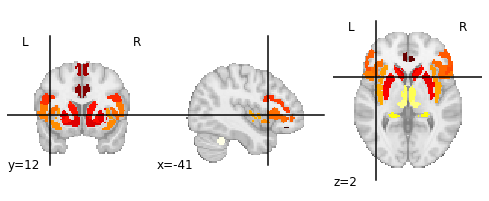

In [4]:
from nilearn import plotting
plotting.plot_stat_map(mask_file, colorbar=False)

In [5]:
from nilearn import masking
from nilearn import image

stat_img_all_rois = image.new_img_like(ref_niimg=mask, 
                                       data=np.zeros_like(mask.get_fdata(), 
                                                          dtype=np.float32), 
                                       copy_header=True)
#image.math_img(f"img==0", img=mask_file)

for idx_roi in tqdm(np.arange(roi_data.shape[0])):
    mask_roi = image.math_img(f"img=={idx_roi+1}", img=mask)
    num_voxels = np.where(mask_roi.get_fdata())[0].shape[0]
    vox_data = roi_data[idx_roi] * np.ones(shape=(num_voxels,))
    stat_img = masking.unmask(vox_data, mask_img=mask_roi)
    stat_img_all_rois = image.math_img(f"img_all+img_roi", img_all=stat_img_all_rois, img_roi=stat_img)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 85/85 [00:24<00:00,  3.53it/s]


In [6]:
stat_img_all_rois.to_filename('./figures/stat_img_all_rois.nii.gz')

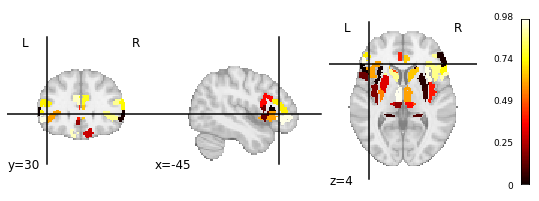

In [7]:
plotting.plot_stat_map(stat_img_all_rois, colorbar=True)
# stat_img_all_rois.get_fdata().shape